In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Read in Data

In [3]:
data = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

# Examine Data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [5]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [6]:
data.tail()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18
4999,5000,44,734,288,2,debit,2017-03-18 15:48:18


In [9]:
data[['order_amount', 'total_items']].describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


<p> The AOV calculated was calculated by taking the total order_amount and dividing by the total number of orders. However, this is not an accurate representation of the data as the median order_amount is \$284, the range varies from \$90 to \$70400, and there is a standard deviation of \$41282.54. These values indicate the solely the average isn't the best representation of the AOV as there are significant outliers skewing the data. This can further be shown by the graph below. The data within the 25th and 75th percentile lie between \$163 and \$390, which are realistic prices for shoes. There are outliers far beyond this range that are making the mean very high. <p>

<AxesSubplot:>

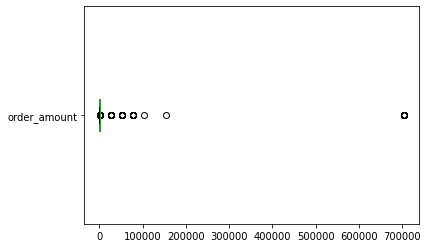

In [28]:
# Plot box plot to see variance in data
data['order_amount'].plot(kind='box', vert=False)


(array([4.972e+03, 1.000e+01, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.700e+01]),
 array([9.00000e+01, 7.04810e+04, 1.40872e+05, 2.11263e+05, 2.81654e+05,
        3.52045e+05, 4.22436e+05, 4.92827e+05, 5.63218e+05, 6.33609e+05,
        7.04000e+05]),
 <BarContainer object of 10 artists>)

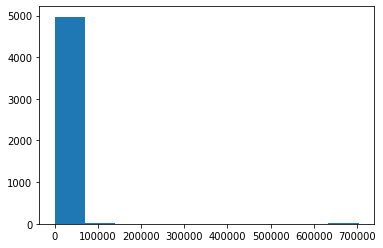

In [30]:
plt.hist(data.order_amount)


# Outliers

In [36]:
outliers = data[data['order_amount'] > 390]
outliers[['order_amount', 'total_items']].describe()


,order_amount,total_items
count,1247.000000,1247.000000
mean,11917.182037,30.518043
std,82066.361894,231.633046
min,392.000000,1.000000
25%,459.000000,3.000000
50%,507.000000,3.000000
75%,591.000000,4.000000
max,704000.000000,2000.000000


In [37]:
wo_outliers = data[data['order_amount'] < 390]
wo_outliers[['order_amount', 'total_items']].describe()


,order_amount,total_items
count,3713.000000,3713.000000
mean,228.740641,1.556693
std,84.814702,0.581762
min,90.000000,1.000000
25%,153.000000,1.000000
50%,222.000000,2.000000
75%,310.000000,2.000000
max,387.000000,4.000000


By comparing the data with and without the outliers, we can recognize that the outliers themselves have a mean order_amount of \$11,917 compared to the rest of the data having a mean of \$228. This jump in spending is worth noting. AOV is more accurate without outliers. However, taking out big purchases just because they are big, isn't completely accurate. We can't control customer spending habits, so we need to look more into where these outliers are coming from.

<h1>Store-by-Store Analysis</h1>

In [44]:
store = data.copy()
store = store[['shop_id', 'order_amount', 'total_items']]
store['unit_price'] = store['order_amount'] / store['total_items']
order = store.groupby(store['shop_id'])['unit_price'].mean().reset_index().sort_values(by=['unit_price'], ascending = False).head()
print(order)

    shop_id  unit_price
77       78     25725.0
41       42       352.0
11       12       201.0
88       89       196.0
98       99       195.0


<p>From this we can see that while other stores have an average shoe unit_price of up to \$352, shop 78 prices their shoes at an unit_price of \$25,725. This is a heafty price for a shoe and is one source of the skewed data.</p>

<h1> Remove Store 78 </h1>

In [47]:
store_78 = data.copy()
store_78 = store_78[store_78['shop_id'] == 78]
print(store_78.head())

     order_id  shop_id  user_id  order_amount  total_items payment_method  \
160       161       78      990         25725            1    credit_card   
490       491       78      936         51450            2          debit   
493       494       78      983         51450            2           cash   
511       512       78      967         51450            2           cash   
617       618       78      760         51450            2           cash   

              created_at  
160   2017-03-12 5:56:57  
490  2017-03-26 17:08:19  
493  2017-03-16 21:39:35  
511   2017-03-09 7:23:14  
617  2017-03-18 11:18:42  


In [52]:
wo_78 = data[data['shop_id'] != 78]
wo_78[['order_amount', 'total_items']].describe()

,order_amount,total_items
count,4954.000000,4954.000000
mean,2717.367784,8.851029
std,41155.996469,116.857286
min,90.000000,1.000000
25%,163.000000,1.000000
50%,284.000000,2.000000
75%,390.000000,3.000000
max,704000.000000,2000.000000


<p> Removing Store 78 alone is not enough. There is still a high standard deviation and the mean is still in the tousands.</p>

<h1> Outlier in Items Bought </h1>

<p> The price that the shoe is being sold at is not the only outlier that we need to consider. There are also outliers in the number of items bought, which would create high variance in the order_amount as each shoe is not sold at the same price. As we can see in the code below, most stores have no more than 8 shoes bought with each transaction, but store 42 has transactions with 2000 shoes at once. </p>

In [50]:
data.groupby(data['total_items'])['shop_id'].mean().reset_index().sort_values(by=['total_items'], ascending = False).head()

,total_items,shop_id
7,2000,42.000000
6,8,54.000000
5,6,65.555556
4,5,47.272727
3,4,49.839590


In [51]:
data[data['total_items'] == 2000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


<p> Customer 607 is repeatedly buying 2000 shoes from shop 42. While these purchases can't be controlled, it is worth noting that this is a big outlier in the data. </p>

In [55]:
wo_78_607 = wo_78[wo_78['user_id'] != 607]
wo_78_607[['order_amount', 'total_items']].describe()

,order_amount,total_items
count,4937.000000,4937.000000
mean,302.580514,1.994734
std,160.804912,0.982821
min,90.000000,1.000000
25%,163.000000,1.000000
50%,284.000000,2.000000
75%,387.000000,3.000000
max,1760.000000,8.000000


<p> Removing data from store 78 and user 607, reduces the mean to \$302, which is a much more accurate pricing, as well as decreases the standard deviation to \$160. However, throwing out valid purchases just because the customer bought too much may not be accurate from a business standpoint. Outliers need to be raised as being skeptical and thrown out only if they are true anomalies. </p>

<h1> Median </h1>

<p> Because repeated valid data points, even if they are outliers, shouldn't be thrown out solely based on the fact that they are outliers, another metric should be used and that is taking the median or doing a percentile analysis of the original data. The median represents the point where half the data is above or below. The median is also always between the mode and the mean, therefore it is the best of the three to choose when the data is significantly skewed like this. </p>

In [67]:
print("Median of Original Data: $%2.2f" % data['order_amount'].median())
print("Median of Data Without All Outliers: $%2.2f" % wo_outliers['order_amount'].median())
print("Median of Data Without Store 78 and Without User 607: $%2.2f" % wo_78_607['order_amount'].median())

Median of Original Data: $284.00
Median of Data Without All Outliers: $222.00
Median of Data Without Store 78 and Without User 607: $284.00


<p> From the three median calculations, we find that the median is not impacted as significantly with or without outliers, futher showing that it is a better measure for calculating the average order value. </p>

<h1> Conclusion </h1>

<p> In conclusion, we first started out with analyzing the data to figure out where the AOV of \$3145.13 was coming from. Then we calculated what the outliers and removed all of them. However, we wanted to dive deeper into the source of these outliers thus we did a store-by-store analysis and an user spending habit analysis. From this, we concluded that Store 78 was significantly overpricing its shoes on a unit_price calculation and User 607 had striking spending habits. These two factors were big outliers, but are sources of good business for the company. Therefore, can't be taken out unless the data points are truly inaccurate reports. So we should use the original data as is. However, a mean calculation isn't accurate, but a median metric is. The median metric isn't swayed by outliers, but treats each data point with equivalent weight. The value of the median of the original data was \$284.00 </p>